## **Tested and Modified for NVIDIA Infrastructure**

## **Problem Statement**

This notebook aims to predict whether existing health insurance policyholders would be interested in purchasing vehicle insurance. The objective is to assist the insurance company in targeting potential customers more effectively.

**Objectives:**
- Identify customers likely to buy vehicle insurance using their demographic and policy-related data.
- Use logistic regression for binary classification (interested or not interested).
- Improve marketing efficiency by focusing on high-probability customers.

**Data Description:**
The dataset used in this notebook is the [Health Insurance Cross Sell Prediction](https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction/data) dataset from Kaggle. It contains customer information related to demographics, vehicle history, and insurance policies. The target variable indicates whether a customer is interested in purchasing vehicle insurance.

**Features Considered:**
- **Gender**: Gender of the customer
- **Age**: Age of the customer
- **Driving_License**: 0 if the customer does not have a driving license, 1 if the customer has a driving license
- **Region_Code**: Unique code for the region of the customer
- **Previously_Insured**: 1 if the customer already has vehicle insurance, 0 otherwise
- **Vehicle_Age**: Age of the vehicle
- **Vehicle_Damage**: 1 if the customer got his/her vehicle damaged in the past, 0 otherwise
- **Annual_Premium**: The amount the customer needs to pay as premium in the year
- **Policy_Sales_Channel**: Anonymized code for the channel of outreaching to the customer
- **Vintage**: Number of days the customer has been associated with the company
- **Response**: 1 if the customer is interested in vehicle insurance, 0 otherwise

**Notebook Flow:**
- Import necessary libraries
- Load and explore the dataset
- Preprocess the data
- Train a logistic regression model using **SGDClassifier with loss='log_loss'**
- Evaluate and interpret the results


## **Install Dependencies**
To ensure that we are using the latest versions of required libraries, we install updated packages using the commands below:


In [2]:
!pip install -U scikit-learn
!pip install -U imbalanced-learn

--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1752, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1390, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/segment.py", line 245, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1368, in render
    renderable = rich_cast(renderable)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/protocol.py", line 36

###  **Import Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## **. Data Loading**

There are two common approaches to load datasets in notebooks:

1. **Online loading**: Fetching the dataset directly from a URL or a remote source such as Kaggle APIs, Google Drive, or cloud buckets.
2. **Local loading**: Loading the dataset from a local or mounted file system path.

In this notebook, we are using the **local loading approach**. The dataset is assumed to be stored in the local filesystem at `/workspace/train.csv`.

In [4]:
file_path = '/workspace/train.csv' 
data = pd.read_csv(file_path)
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## **Exploratory Data Analysis (EDA)**

Before building a machine learning model, it's important to understand the structure and quality of the data. This section provides a brief summary of the dataset using the following steps:

In [5]:
print("Shape of dataset:", data.shape)
print("\nMissing values:")
print(data.isnull().sum())
print("\nClass distribution:")
print(data['Response'].value_counts())

Shape of dataset: (381109, 12)

Missing values:
id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Class distribution:
0    334399
1     46710
Name: Response, dtype: int64


## **Data Preprocessing**

To prepare the dataset for training a machine learning model, we need to encode categorical features, scale numerical features, and split the data into training and testing sets. This ensures that the model can interpret and learn effectively from the data.


In [6]:
# Encode categorical variables
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Vehicle_Damage'] = le.fit_transform(data['Vehicle_Damage'])
data['Vehicle_Age'] = le.fit_transform(data['Vehicle_Age'])

# Define X and y
X = data.drop(['id', 'Response'], axis=1)
y = data['Response']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [7]:
print(y_train.value_counts(normalize=True))


0    0.87803
1    0.12197
Name: Response, dtype: float64


# **Model Training**

Now that the data is preprocessed, we train a logistic regression model using `SGDClassifier` from `scikit-learn`.



In [9]:
model = SGDClassifier(loss='log_loss', max_iter=1000, random_state=42,class_weight='balanced')
model.fit(X_train, y_train)

SGDClassifier(class_weight='balanced', loss='log_loss', random_state=42)

## **Handling Class Imbalance with SMOTE (Optional)**

Imbalanced datasets can bias the model towards the majority class, resulting in poor performance on the minority class. To address this, we can use **SMOTE (Synthetic Minority Over-sampling Technique)**.


In [10]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
model.fit(X_train, y_train)


SGDClassifier(class_weight='balanced', loss='log_loss', random_state=42)

# **Threshold Tuning and Evaluation**

By default, classifiers like logistic regression use a threshold of **0.5** to convert predicted probabilities into binary class labels. However, in imbalanced datasets, **adjusting the threshold** can significantly impact performance—especially precision, recall, and the F1-score.

### **Predicting Probabilities**

In [21]:
# Predict probabilities
y_proba = model.predict_proba(X_test)[:, 1]

threshold = 0.6
y_pred_custom = (y_proba >= threshold).astype(int)

# Evaluate
print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))


[[41437 25262]
 [  654  8869]]
              precision    recall  f1-score   support

           0       0.98      0.62      0.76     66699
           1       0.26      0.93      0.41      9523

    accuracy                           0.66     76222
   macro avg       0.62      0.78      0.58     76222
weighted avg       0.89      0.66      0.72     76222



# **Confusion Matrix Visualization**

After adjusting the threshold and evaluating performance metrics, it's helpful to **visualize the confusion matrix** to better understand the classification performance.

### **Visualizing with a Heatmap**

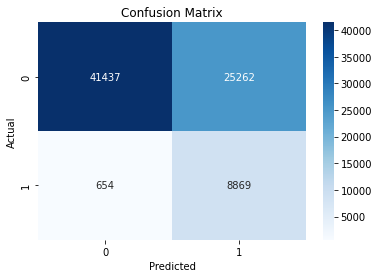

In [20]:
sns.heatmap(confusion_matrix(y_test, y_pred_custom), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [19]:
from sklearn.metrics import roc_auc_score
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


ROC AUC Score: 0.8199980058395822
